From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html <br>
SVM : https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/ <br>
서포트 벡터 머신(SVM) - 매개변수 C와 gamma: https://bskyvision.com/163

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* <span style='color:red'>클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)</span>라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

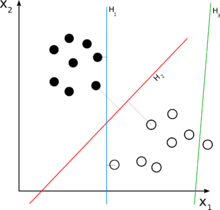

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.svm import SVR, SVC # support vector regression, classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE  # pronounce 티쓰니 or 티쯔니
from sklearn.utils import shuffle

seed = 2022
np.random.seed(seed)

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [3]:
X, y = load_boston(return_X_y=True) # 회귀 데이터
# X, y = shuffle(X, y, random_state=seed) 
# do not need shuffle beforehand because train_test_split shuffles by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [4]:
model = None
model = SVR()
model.fit(X_train, y_train)

SVR()

In [5]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.1814771039213966
평가 데이터 점수: 0.3080993151888275


### SVM을 사용한 분류 모델 (SVC)

In [6]:
X, y = load_breast_cancer(return_X_y=True) # 분류데이터
# X, y = shuffle(X, y, random_state=seed)
# do not need shuffle beforehand because train_test_split shuffles by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [7]:
model = None
model = SVC()
model.fit(X_train, y_train)

SVC()

In [8]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9186813186813186
평가 데이터 점수: 0.9122807017543859


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

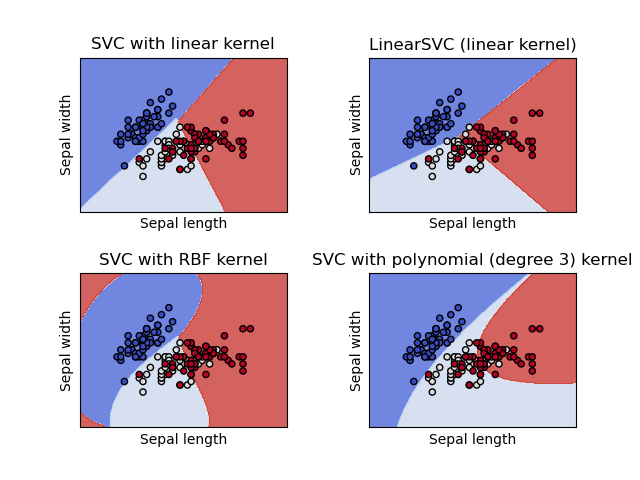

In [9]:
X, y = load_boston(return_X_y=True) # 회귀 데이터
# X, y = shuffle(X, y, random_state=seed)
# do not need shuffle beforehand because train_test_split shuffles by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [10]:
linear_svr = None
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = None
polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = None
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.7238163093591035
Linear SVR 평가 데이터 점수: 0.5538593421529654
Polynomial SVR 학습 데이터 점수: 0.17422703433953046
Polynomial SVR 평가 데이터 점수: 0.3071432484412703
RBF SVR 학습 데이터 점수: 0.1814771039213966
RBF SVR 평가 데이터 점수: 0.3080993151888275


In [11]:
X, y = load_breast_cancer(return_X_y=True) # 분류데이터
# X, y = shuffle(X, y, random_state=seed)
# do not need shuffle beforehand because train_test_split shuffles by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [12]:
linear_svc = None
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = None
polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = None
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.9648351648351648
Linear SVC 평가 데이터 점수: 0.9298245614035088
Polynomial SVC 학습 데이터 점수: 0.9142857142857143
Polynomial SVC 평가 데이터 점수: 0.9035087719298246
RBF SVC 학습 데이터 점수: 0.9186813186813186
RBF SVC 평가 데이터 점수: 0.9122807017543859


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [13]:
polynomial_svc = None
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print('kernel=poly, degree={}, C={}, gamma={}'.format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.978021978021978
Polynomial SVC 평가 데이터 점수: 0.9385964912280702


결과가 많이 좋아짐

In [14]:
rbf_svc = None
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print('kernel=rbf, C={}, gamma={}'.format(2, 'scale'))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

kernel=rbf, C=2, gamma=scale
RBF SVC 학습 데이터 점수: 0.9186813186813186
RBF SVC 평가 데이터 점수: 0.9210526315789473


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [15]:
X, y = load_breast_cancer(return_X_y=True) # 분류데이터
# X, y = shuffle(X, y, random_state=seed)
# do not need shuffle beforehand because train_test_split shuffles by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [16]:
model = None
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9186813186813186
SVC 평가 데이터 점수: 0.9122807017543859


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # do not use .fit_trainsform

train data에서 사용된 scale 기준을 X_test에 그대로 사용함
https://sebastianraschka.com/faq/docs/scale-training-test.html

In [18]:
model = None
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9846153846153847
SVC 평가 데이터 점수: 0.9736842105263158


<span style='color:red'>정규화 후에 성능이 매우 좋아짐</span>

In [19]:
scaler = MinMaxScaler() # min max scaler 사용
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9824175824175824
SVC 평가 데이터 점수: 0.9736842105263158


## Linear SVR

### 보스턴 주택 가격

In [20]:
X, y = load_boston(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = None
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [23]:
print("SVR 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVR 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVR 학습 데이터 점수: 0.7218443005740591
SVR 평가 데이터 점수: 0.5438055982699892


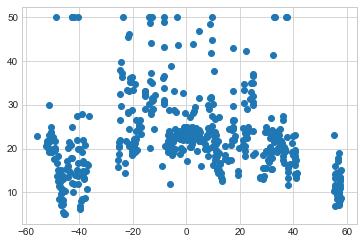

In [24]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

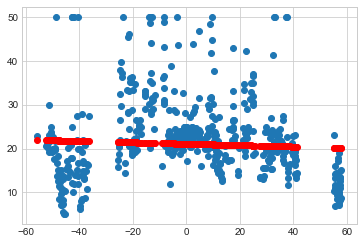

In [25]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [26]:
estimator = make_pipeline(StandardScaler(),
                         SVR(kernel='linear'))
cross_validate(estimator=estimator,
              X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    9.5s finished


{'fit_time': array([0.07295799, 0.07895327, 0.04996824, 0.0469687 , 0.05496693]),
 'score_time': array([0.00699735, 0.00599813, 0.00500107, 0.00399756, 0.00599837]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [27]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=1)

In [28]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

In [29]:
gs.best_params_

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}

In [30]:
gs.best_score_ , gs.best_index_

(0.49854468515517, 6)

### 당뇨병

In [31]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = None
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.5082749390152362
SVR 평가데이터 점수: 0.5100385668678831


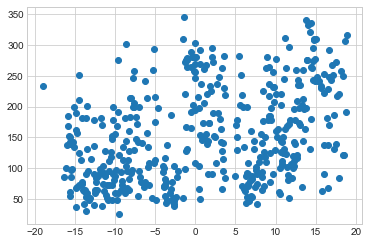

In [34]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

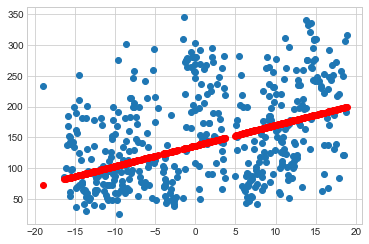

In [35]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [36]:
estimator = make_pipeline(StandardScaler(),
                         SVR(kernel='linear'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.03197598, 0.0229845 , 0.02298307, 0.02498531, 0.01698709]),
 'score_time': array([0.00499845, 0.00399876, 0.00399756, 0.00399828, 0.00199866]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [37]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=1)

In [38]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [39]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}

In [40]:
gs.best_score_ , gs.best_index_

(0.4780769992158147, 0)

## Kernel SVR

### 보스턴 주택 가격

In [41]:
X, y = load_boston(return_X_y=True) # 회귀 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = None
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.6826345549835051
SVR 평가데이터 점수: 0.6835235948702826


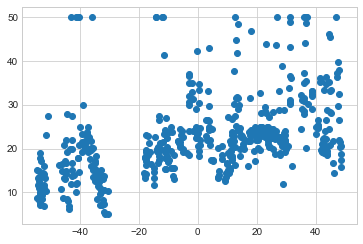

In [44]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

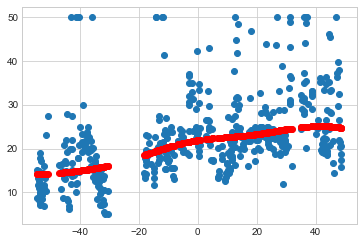

In [45]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [46]:
estimator = make_pipeline(StandardScaler(),
                         SVR(kernel='rbf'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.03797698, 0.03897667, 0.0369761 , 0.06895852, 0.03597856]),
 'score_time': array([0.02298784, 0.0279851 , 0.02498817, 0.01599121, 0.01199341]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [47]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.17631266        nan 0.14981591]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=4,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=1)

In [48]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [49]:
gs.best_params_, gs.best_score_ , gs.best_index_

({'model__kernel': 'rbf'}, 0.17631266230186618, 0)

성능이 rbf가 가장 좋은 것으로 나타났으니, rbf에 대한 hyperparameter를 수정하면서 최적 서치

In [50]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=1)

In [51]:
gs.best_params_, gs.best_score_ , gs.best_index_

({'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'},
 0.1780747543330848,
 4)

In [52]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

### 당뇨병

In [53]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))


SVR 학습데이터 점수: 0.16661777972708758
SVR 평가데이터 점수: 0.1678707339514206


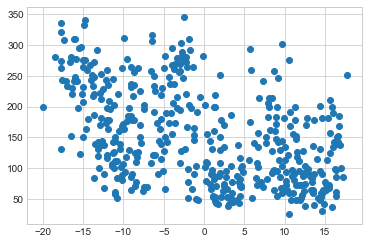

In [54]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

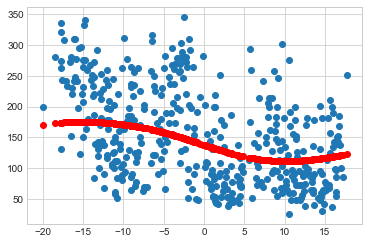

In [55]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [56]:
estimator = make_pipeline(StandardScaler(),
                         SVR(kernel='rbf'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.02898097, 0.02797961, 0.02898073, 0.027982  , 0.03098273]),
 'score_time': array([0.02298975, 0.01799107, 0.02199006, 0.03398395, 0.01199269]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [57]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'sigmoid', 'polynomial']}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])
Best Parameters: {'model__kernel': 'sigmoid'}
Best Score: 0.3491358880113567, Best Index: 1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.14659936 0.34913589        nan]
  warnings.warn(


sigmoid가 높게 나옴. 다른 파라미터 확인

In [58]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])
Best Parameters: {'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
Best Score: 0.35001409316735377, Best Index: 1


In [59]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.3612647693717458
SVR 평가데이터 점수: 0.4055256354205038


## Linear SVC

### 유방암

In [60]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.9868131868131869
SVR 평가데이터 점수: 0.9824561403508771


In [61]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [62]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [63]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

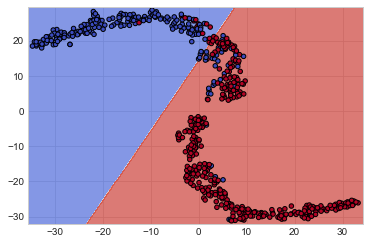

In [64]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [65]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='linear'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01698494, 0.0139904 , 0.01398778, 0.01398993, 0.00899339]),
 'score_time': array([0.00200009, 0.00199938, 0.00299954, 0.00199914, 0.00200081]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [66]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
Best Parameters: {'model__C': 0.1, 'model__gamma': 'scale'}
Best Score: 0.9736531594472908, Best Index: 2


### 붓꽃

In [67]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.9666666666666667
SVR 평가데이터 점수: 0.9333333333333333


In [68]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [69]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [70]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

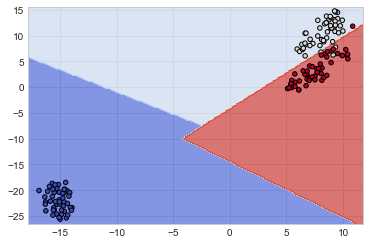

In [71]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [72]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='linear'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00399947, 0.00399542, 0.00399876, 0.00500178, 0.0039959 ]),
 'score_time': array([0.00099969, 0.00099993, 0.00200343, 0.00099373, 0.00099921]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [73]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
Best Parameters: {'model__C': 1.0, 'model__gamma': 'scale'}
Best Score: 0.9666666666666668, Best Index: 0


### 와인

In [74]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 1.0
SVR 평가데이터 점수: 0.9166666666666666


In [75]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [76]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [77]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

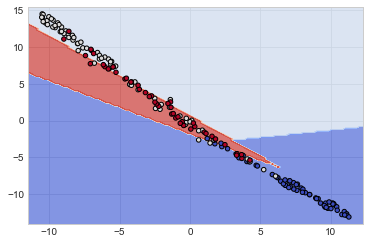

In [78]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [79]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='linear'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00499964, 0.00499845, 0.00499225, 0.00599527, 0.0039959 ]),
 'score_time': array([0.00099874, 0.00200033, 0.00199866, 0.00199914, 0.00199866]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [80]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
Best Parameters: {'model__C': 0.1, 'model__gamma': 'scale'}
Best Score: 0.972063492063492, Best Index: 2


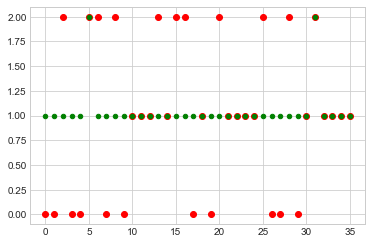

In [81]:
model = gs.best_estimator_
predicted = model.predict(X_test)
plt.scatter(np.arange(len(y_test)), y_test, c='r')
plt.scatter(np.arange(len(predicted)), predicted, c='g', s=20)

## Kernel SVC

### 유방암

In [82]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.9846153846153847
SVR 평가데이터 점수: 0.9736842105263158


In [83]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [84]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [85]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

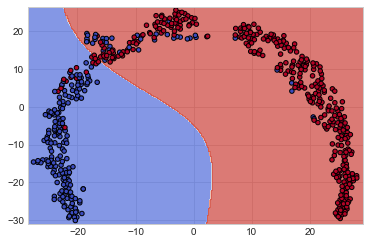

In [86]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [87]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='rbf'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01798868, 0.01898909, 0.01898813, 0.04497218, 0.01899958]),
 'score_time': array([0.00899601, 0.00999331, 0.00899673, 0.00899386, 0.00898361]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [88]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
Best Parameters: {'model__C': 1.0, 'model__gamma': 'scale'}
Best Score: 0.9736376339077782, Best Index: 0


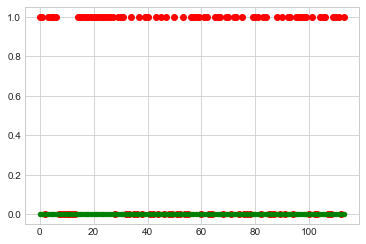

In [89]:
model = gs.best_estimator_
predicted = model.predict(X_test)
plt.scatter(np.arange(len(y_test)), y_test, c='r')
plt.scatter(np.arange(len(predicted)), predicted, c='g', s=20)

### 붓꽃

In [90]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 0.9833333333333333
SVR 평가데이터 점수: 0.9666666666666667


In [91]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [92]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [93]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

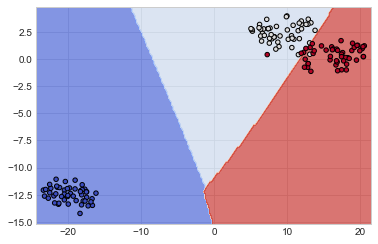

In [94]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [95]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='rbf'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00497556, 0.00499916, 0.00499725, 0.00499701, 0.00399804]),
 'score_time': array([0.0019989 , 0.00199652, 0.00199866, 0.0009985 , 0.00099945]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [96]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
Best Parameters: {'model__C': 1.0, 'model__gamma': 'scale'}
Best Score: 0.9666666666666666, Best Index: 0


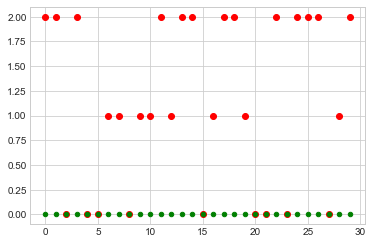

In [97]:
model = gs.best_estimator_
predicted = model.predict(X_test)
plt.scatter(np.arange(len(y_test)), y_test, c='r')
plt.scatter(np.arange(len(predicted)), predicted, c='g', s=20)

### 와인

In [98]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = None
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print('SVR 학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVR 평가데이터 점수: {}'.format(model.score(X_test, y_test)))

SVR 학습데이터 점수: 1.0
SVR 평가데이터 점수: 1.0


In [99]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [100]:
def plot_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [101]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] 
xx, yy = make_meshgrid(X0, X1)

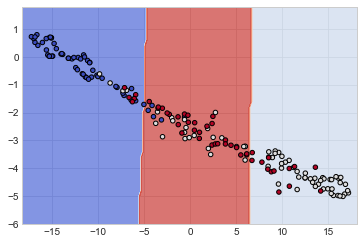

In [102]:
model.fit(X_comp, y)

plot_contourf(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [103]:
estimator = make_pipeline(StandardScaler(),
                         SVC(kernel='rbf'))

cross_validate(estimator=estimator,
              X=X, y=y, cv=5,
              n_jobs=multiprocessing.cpu_count(),
              verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00599813, 0.00599718, 0.00599623, 0.00799584, 0.00700212]),
 'score_time': array([0.0029974 , 0.00199771, 0.00199914, 0.00300217, 0.00301671]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [104]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5, verbose=1)

gs.fit(X, y)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Best Parameters: {}".format(gs.best_params_))
print('Best Score: {}, Best Index: {}'.format(gs.best_score_ , gs.best_index_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
Best Parameters: {'model__C': 1.0, 'model__gamma': 'scale'}
Best Score: 0.9833333333333334, Best Index: 0


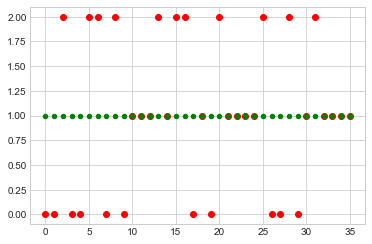

In [105]:
model = gs.best_estimator_
predicted = model.predict(X_test)
plt.scatter(np.arange(len(y_test)), y_test, c='r')
plt.scatter(np.arange(len(predicted)), predicted, c='g', s=20)

### cross validation의 의미 재확인
cv, predict연결, predict 그림 확인.best score, best index, fit_time, score_time 등